<a href="https://colab.research.google.com/github/anusree-k-r/Anusree-K-R-works/blob/main/Anusree_K_R_preprocessing_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('iris.xls')

In [96]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
### Preprocessing

In [5]:
data.shape

(150, 5)

In [6]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

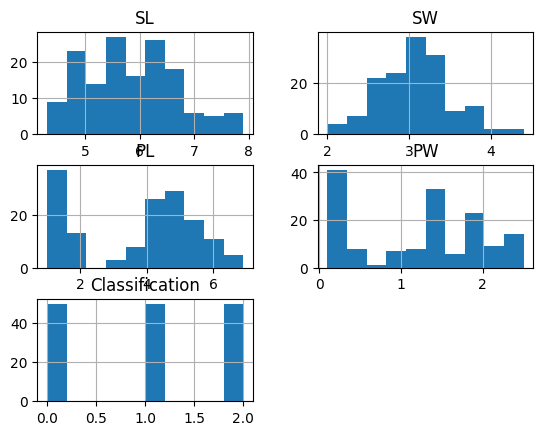

In [97]:
data.hist()
plt.show()

<ipython-input-98-b21962c5e4fb>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,j)


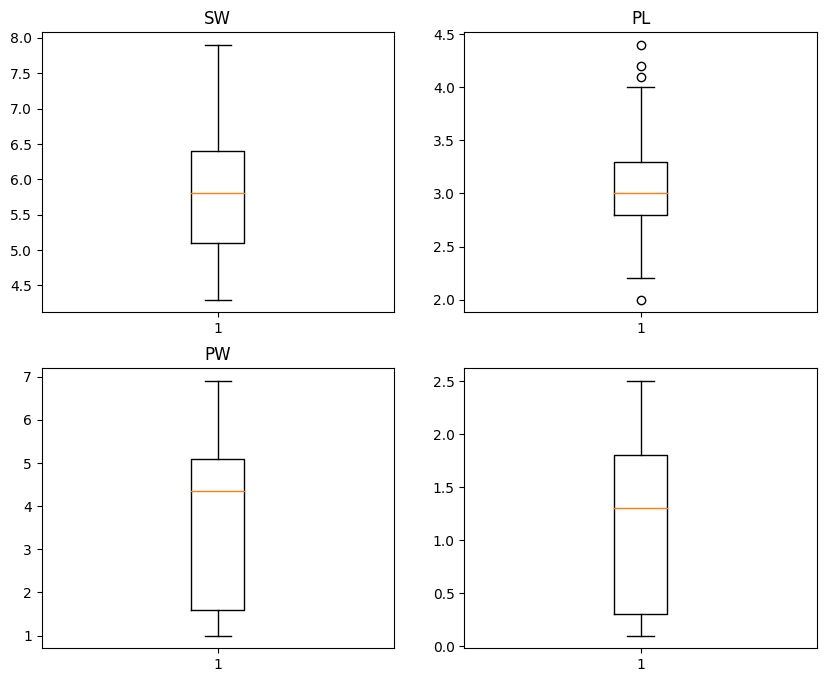

In [98]:
plt.figure(figsize=(10,8))
j=1
for i in ['SL', 'SW', 'PL', 'PW']:
    plt.title(i)
    plt.subplot(2,2,j)
    plt.boxplot(data[i])
    j=j+1
plt.show()

In [9]:
### handling outliers

In [10]:
for i in ['PL']:
    Q1 = np.percentile(data[i],25, interpolation='midpoint')
    Q2 = np.percentile(data[i],50, interpolation='midpoint')
    Q3 = np.percentile(data[i],75, interpolation='midpoint')
    if Q2==data[i].median():
        IQR = Q3-Q1
        low_lim = Q1-1.5*IQR
        up_lim = Q3 + 1.5*IQR
        outlier = []
        for x in data[i]:
            if(x<low_lim) or (x>up_lim):
                outlier.append(x)
        ind2 = data[i]>up_lim
        ind3 = data[i]<low_lim
        indicestodrop2 = data.loc[ind2].index
        indicestodrop3 = data.loc[ind3].index
        data = data.drop(indicestodrop2)
        data = data.drop(indicestodrop3)
    else:
        print('check again')
data.shape

<ipython-input-10-657b9414c088>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data[i],25, interpolation='midpoint')
<ipython-input-10-657b9414c088>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data[i],50, interpolation='midpoint')
<ipython-input-10-657b9414c088>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data[i],7

(150, 5)

In [11]:
### Classification models

In [12]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])

In [16]:
data.head

<bound method NDFrame.head of       SL   SW   PL   PW  Classification
0    5.1  3.5  1.4  0.2               0
1    4.9  3.0  1.4  0.2               0
2    4.7  3.2  1.3  0.2               0
3    4.6  3.1  1.5  0.2               0
4    5.0  3.6  1.4  0.2               0
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3               2
146  6.3  2.5  5.0  1.9               2
147  6.5  3.0  5.2  2.0               2
148  6.2  3.4  5.4  2.3               2
149  5.9  3.0  5.1  1.8               2

[150 rows x 5 columns]>

In [17]:
X = data.drop('Classification', axis=1)
y = data['Classification']

In [23]:
##spilitting the data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size = 0.75, random_state=42)

In [18]:
### Logistics Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr= LogisticRegression(multi_class='multinomial', max_iter=1000)
model= lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
print(confusion_matrix(y_test, y_pred))

[[42  0  0]
 [ 0 33  3]
 [ 0  1 34]]


In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [35]:
print(accuracy_score(y_test, y_pred))

0.9646017699115044


In [36]:
data['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

In [38]:
# kNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
metric_k = []
neighbors = np.arange(3, 15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    metric_k.append(acc)

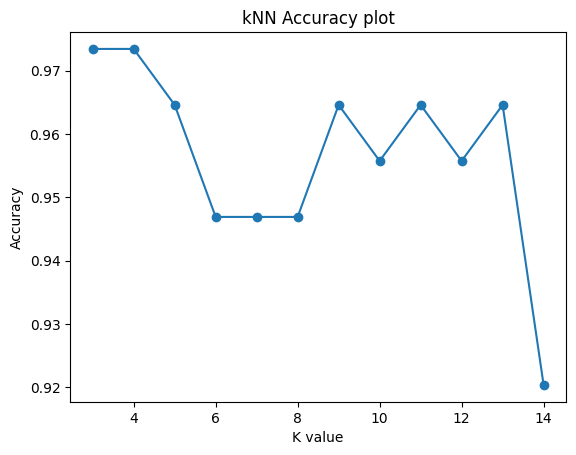

In [99]:
plt.plot(neighbors,metric_k, 'o-')
plt.title('kNN Accuracy plot')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

In [42]:
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [43]:
accuracy_score(y_test, y_pred)

0.9469026548672567

In [44]:
confusion_matrix(y_test, y_pred)

array([[42,  0,  0],
       [ 0, 34,  2],
       [ 0,  4, 31]])

In [73]:
###SVM (linear)

In [75]:
from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear')
model = svmclf.fit(X_train, y_train)
y_pred = svmclf.predict(X_test)

In [76]:
accuracy_score(y_test,y_pred)

0.9646017699115044

In [77]:
confusion_matrix(y_test, y_pred)

array([[42,  0,  0],
       [ 0, 32,  4],
       [ 0,  0, 35]])

In [48]:
## SVM (poly)

In [46]:
from sklearn.svm import SVC
svmclf= SVC(kernel='poly')
model = svmclf.fit(X_train, y_train)
y_pred = svmclf.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred)

0.9823008849557522

In [50]:
confusion_matrix(y_test, y_pred)

array([[42,  0,  0],
       [ 0, 34,  2],
       [ 0,  0, 35]])

In [51]:
### SVC (rbf)

In [52]:
from sklearn.svm import SVC
svmclf= SVC(kernel='rbf')
model = svmclf.fit(X_train, y_train)
y_pred = svmclf.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred)

0.9646017699115044

In [54]:
confusion_matrix(y_test, y_pred)

array([[42,  0,  0],
       [ 0, 33,  3],
       [ 0,  1, 34]])

In [55]:
### DecisionTree

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred)

0.9292035398230089

In [58]:
confusion_matrix(y_test, y_pred)

array([[42,  0,  0],
       [ 0, 31,  5],
       [ 0,  3, 32]])

In [59]:
### RandomForest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)

In [61]:
accuracy_score(y_test, y_pred)

0.9292035398230089

In [62]:
confusion_matrix(y_test, y_pred)

array([[42,  0,  0],
       [ 0, 31,  5],
       [ 0,  3, 32]])

In [65]:
##Best model

In [78]:
svmclf= SVC(kernel='linear')
svmclf.fit(X_train, y_train)
y_pred= svmclf.predict(X_train)

In [79]:
accuracy_score(y_train, y_pred)

1.0

In [80]:
confusion_matrix(y_train, y_pred)

array([[ 8,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 15]])

In [81]:
rf.fit(X_train, y_train)
y_pred= rf.predict(X_train)

In [82]:
accuracy_score(y_train, y_pred)

1.0

In [83]:
confusion_matrix(y_train, y_pred)

array([[ 8,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 15]])

In [84]:
dt.fit(X_train, y_train)
y_pred= dt.predict(X_train)

In [85]:
accuracy_score(y_train, y_pred)

1.0

In [87]:
svmclf= SVC(kernel='linear')
svmclf.fit(X, y)
y_pred= svmclf.predict(X)

In [88]:
accuracy_score(y, y_pred)

0.9933333333333333

In [89]:
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]])

In [95]:
## From the above observations the best results is from decision tree, SVM linear and random forest.